In [1]:
import numpy as np
#import mkl
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import timeit
from rpl import RadarSignalProcessing
import sys
sys.path.append('C:\\Users\\nxg05733\\RADIal\\RADIal')
from DBReader.DBReader import SyncReader

In [15]:
sys.path.append('D:\DSAI-22-24\KTH-Year2\Thesis\RADIal')
root_folder ='C:\\Users\\nxg05733\\RADIAL-data\\RECORD@2020-11-21_11.58.53\\RECORD@2020-11-21_11.58.53'
#db = SyncReader(root_folder,tolerance=40000,offset_radar = -180000,offset_scala = -40000)
db = SyncReader(root_folder,tolerance=40000,)

-------------------------------------------------------------------------
- Sensors available:
-     camera
-     can
-     gps
-     radar_ch0
-     radar_ch1
-     radar_ch2
-     radar_ch3
-     scala
-
- You might use function "setSensorFilters" to select sensors you want to read!
-------------------------------------------------------------------------
Total tolerance errors:  0.39920159680638717 %
Total corrupted frames:  3.3932135728542914 %


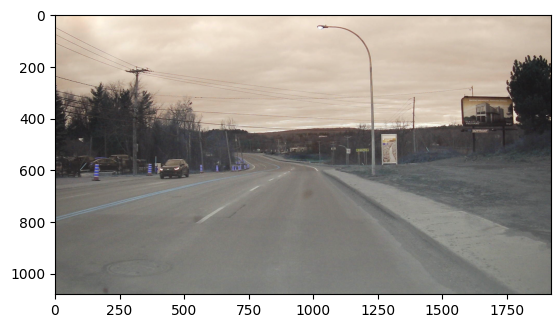

In [16]:
sample = db.GetSensorData(200)
plt.imshow(sample['camera']['data'])

In [17]:
## 4. RadarSignalProcessing to compute Range-Azimuth map


CPU will be used to execute the processing
CPU times: total: 19.5 s
Wall time: 3.16 s


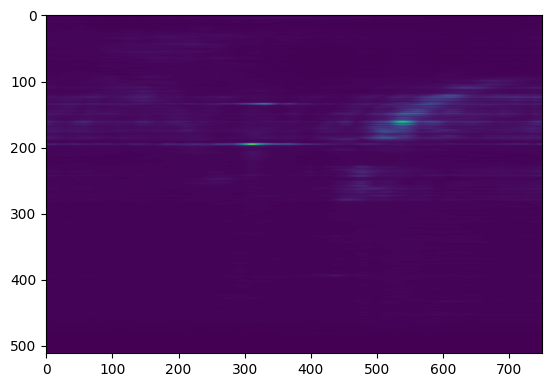

In [18]:
### 4.3 Using CPU
RSP = RadarSignalProcessing('CalibrationTable.npy',method='RA',device='cpu')
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])
plt.imshow(ra)


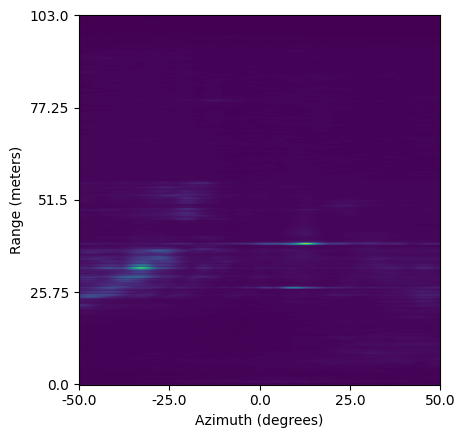

In [19]:
#Flip and Rename axis of image

# Step 1: Flip the image 180 degrees
# Convert this code to a function
import imutils
flipped_image = imutils.rotate(ra, 180)
# Step 2: Reduce the FOV to 100 degrees
flipped_image= flipped_image[:,125:(flipped_image.shape[1]-125)]
plt.imshow(flipped_image)

""" 
""" # Step 2: Rescale the x and y axis to match -75 to 75 degrees (Azimuth) and 0 to 103 meters (Range)
x_labels = np.linspace(-50, 50, num=5)
y_labels = np.linspace(103,0, num=5)
xtik_loc = np.linspace(0, flipped_image.shape[1]-1, num=len(x_labels))
ytik_loc = np.linspace(0, flipped_image.shape[0]-1, num=len(y_labels))
plt.xticks( ticks=xtik_loc, labels=x_labels)
plt.yticks(ticks= ytik_loc, labels=y_labels)

plt.xlabel('Azimuth (degrees)')
plt.ylabel('Range (meters)')

# Step 3: Reduce the FOV to 100 degrees
#Normalize the image
flipped_image = flipped_image - np.min(flipped_image)
flipped_image = flipped_image / np.max(flipped_image)
plt.imshow(flipped_image)


In [21]:
def radar_image_processing(image):
    # Step 1: Flip the image 180 degrees
    flipped_image = imutils.rotate(image, 180)
    # Step 2: Reduce the FOV to 100 degrees
    flipped_image= flipped_image[:,125:(flipped_image.shape[1]-125)]
    # Step 3: Rescale the x and y axis to match -75 to 75 degrees (Azimuth) and 0 to 103 meters (Range)
    x_labels = np.linspace(-50, 50, num=5)
    y_labels = np.linspace(103,0, num=5)
    xtik_loc = np.linspace(0, flipped_image.shape[1]-1, num=len(x_labels))
    ytik_loc = np.linspace(0, flipped_image.shape[0]-1, num=len(y_labels))
    plt.xticks( ticks=xtik_loc, labels=x_labels)
    plt.yticks(ticks= ytik_loc, labels=y_labels)

    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Range (meters)')

    #Normalize the image
    flipped_image = flipped_image - np.min(flipped_image)
    flipped_image = flipped_image / np.max(flipped_image)
    #plt.imshow(flipped_image)
    return flipped_image

In [24]:
# function to just perform Step 3
def rescale_axis(image):
    x_labels = np.linspace(-50, 50, num=5)
    y_labels = np.linspace(103,0, num=5)
    xtik_loc = np.linspace(0, image.shape[1]-1, num=len(x_labels))
    ytik_loc = np.linspace(0, image.shape[0]-1, num=len(y_labels))
    plt.xticks( ticks=xtik_loc, labels=x_labels)
    plt.yticks(ticks= ytik_loc, labels=y_labels)

    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Range (meters)')

    return image

Augmentation of the Image:
1. Blur the image with low pass filters
2. Change Azimuth right or left
3. Change Range (Up or Down)

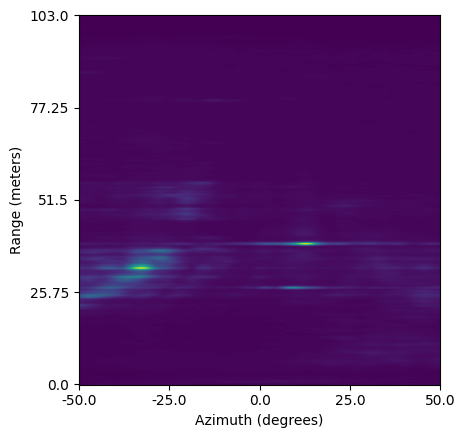

In [26]:
import cv2
# Apply GuassianBlur
blurred_image = cv2.GaussianBlur(flipped_image, (5, 5), 0)
plt.imshow(rescale_axis(blurred_image))


In [27]:
# Get the PSNR of the blurred image and the original image
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 1.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [30]:
psnr( blurred_image, flipped_image)

43.001906212540185

In [32]:
psnr( flipped_image, blurred_image)

43.001906212540185

Perceptual Loss

Inception Distance

Structural Similarity

In [4]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Keypoint descriptors
# SIFT
#ORB
import cv2

def get_keypoints(image):
    sift = cv2.SIFT_create()
    kp = sift.detect(image, None)
    image = cv2.drawKeypoints(image, kp, None)
    return image

In [5]:
while True:
  # Capture frame-by-frame
  ret, image = cap.read()
  file_name = f"C:\\Users\\nxg05733\\Depth-Anything\\results2\\RADIAL_{i}.png"
  i=i+1

  # If frame is read correctly, process or store it
  if ret:
    # You can process the frame here (e.g., convert to grayscale)
    # frames.append(frame)  # Uncomment to store all frames

    # Display the resulting frame
    cv2.imshow('frame', image)
    # wait for 10 s
    cv2.waitKey(10000)

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


SyntaxError: incomplete input (4111242099.py, line 13)